MACHINE LEARNING PROJECT FOR NEXUS BANK

OBJECTIVE: THIS PROJECT IS AIMED AT PREDICTING THE FIRM'S CUSTORMER BEHAVIOUR TOWARDS TERM DEPOSITS AS WELL AS DEFAULT TO LOANS OFFERED BY THE BANK.

BACKGROUND: The above mentioned bank has conducted a number of of campaigns aimed at aquiring term deposits from their customers. The performances of the said campaigns fall too short of the director's expectation, thus his contact with the data firm I represent. I was tasked with the mandate of drawing insights from the bank's datasets which could throw light to the peculiar customer behaviors especially towards defaulting to loans and acceptability of their term deposit campaigns.
The firm want to leverage on the insights, in boosting the productivity of its campaigns thereby increasing subscription to term deposits while also mitigating the risk of loan default by customers.
The project is in four parts, general overview, Extrapolatory Data Analysis(EDA), Unsupervised Machine Larning and a Supervised Machine Learning.

In [51]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [53]:
# Load dataset
df = pd.read_csv(r"C:\Users\CCO\Downloads\bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [54]:
# data features
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [55]:
# Descriptive statistics

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [56]:
# Unique values for age column
df["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [58]:
# Check for missing values

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [59]:
# Check for duplicates


df.duplicated().sum()

0

<Axes: >

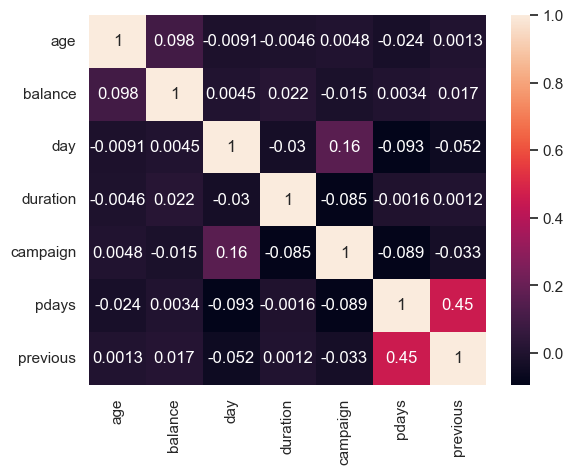

In [63]:
 # Heat map for the correlation of the numerical features
sns.heatmap(df.corr(), annot=True)

Extrapolatory Data Analysis (EDA)

#Univariate Analysis (Categorical)

Text(0.5, 1.0, 'count of deposit')

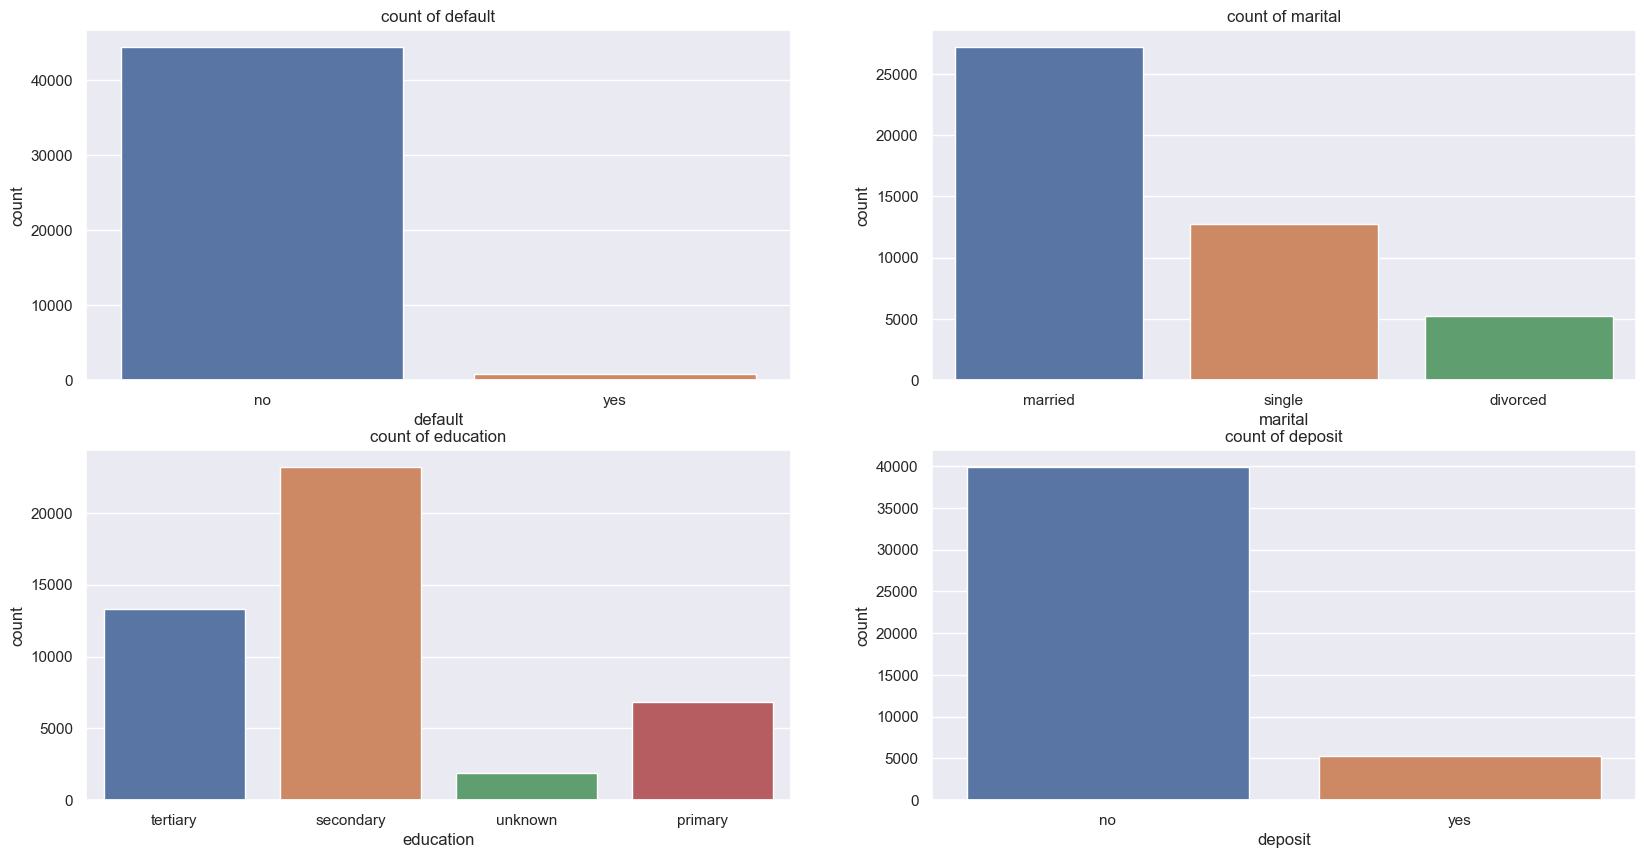

In [62]:
# Subplot for  four categorical variables 
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
sns.countplot(x='default',data=df,ax=axs[0,0])
axs[0,0].set_title('count of default')
sns.countplot(x='marital',data=df,ax=axs[0,1])
axs[0,1].set_title('count of marital')
sns.countplot(x='education',data=df,ax=axs[1,0])
axs[1,0].set_title('count of education')
sns.countplot(x='deposit',data=df,ax=axs[1,1])
axs[1,1].set_title('count of deposit')

This is a countplot of default, marital, education and deposit columns. From this plot customers that has not defaulted in the past which is represented by no is far mor greater than those that have defaulted before.
In the marital column, the category of "married" is significantly higher than others, closely followed by the "single" and ofcourse divorced as the least occurrence.
In the education column secondary leads by a wide margin followed by tertiary, then primary.
In the deposit column where yes represent customers that subscribed to term deposit, majority of the customers are not subsrcibeed and therefore having a more effective campaign could easily increase subscription to term deposits.


<Axes: xlabel='count', ylabel='job'>

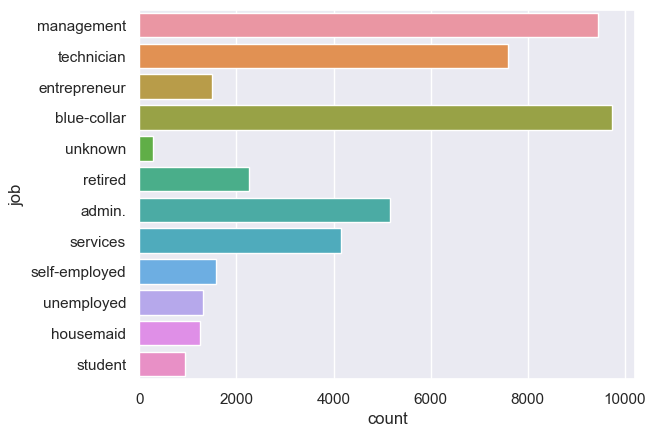

In [64]:
sns.countplot(y='job', data=df)

the above barplot represent the count of job categories of the bank's customers. The blue collar, managemnet and technician are top three job categories. The next three categories are the admin, services and retired. All campaigns should concentrate more on this category not in any way to neglect the under represented categories though. 

<Axes: xlabel='housing', ylabel='count'>

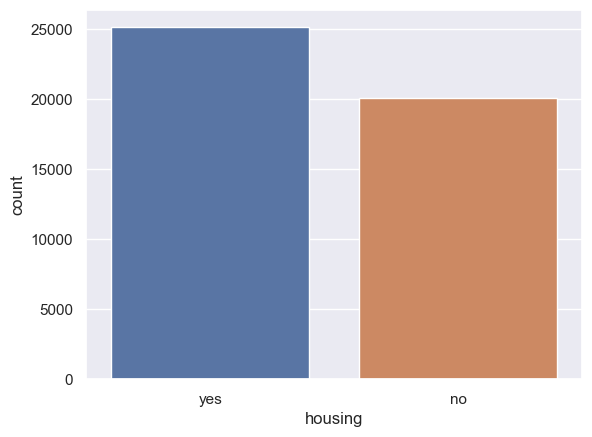

In [65]:
sns.countplot(x='housing', data=df)

This plot shows that slightly more customers have housing loans

<Axes: xlabel='loan', ylabel='count'>

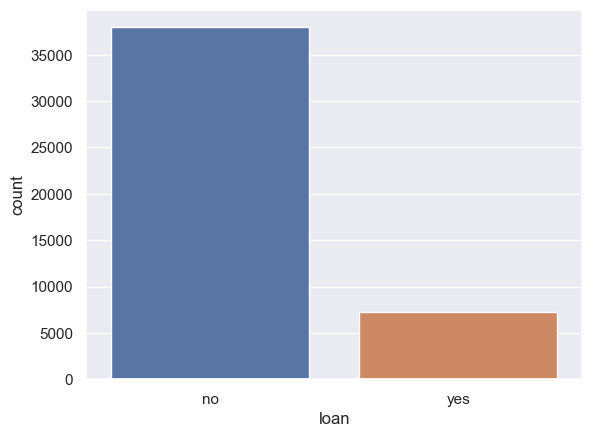

In [66]:
sns.countplot(x='loan', data=df)

Majority of the customers have no personal loans

<Axes: xlabel='poutcome', ylabel='count'>

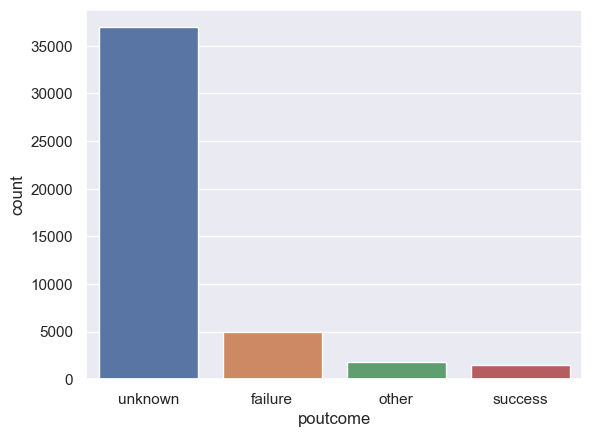

In [67]:
sns.countplot(x='poutcome', data=df)

This plot exposes the primary problem why this project is carried out, which is that success of the company's campaigns is infinitesimally low.
The campaign method should be classified as totally unsustainable with majority of the outcome unknown while other ended up as failures.

<Axes: xlabel='contact', ylabel='count'>

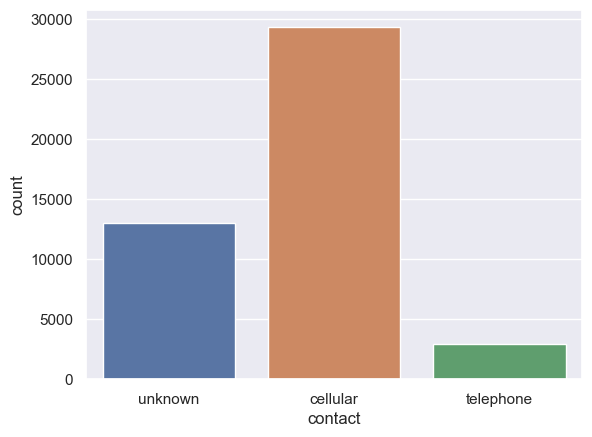

In [68]:

sns.countplot(x='contact', data=df)

In [ ]:
The data indicate that contacts were made majorly with celluar.

# Numerical features

<Axes: ylabel='duration'>

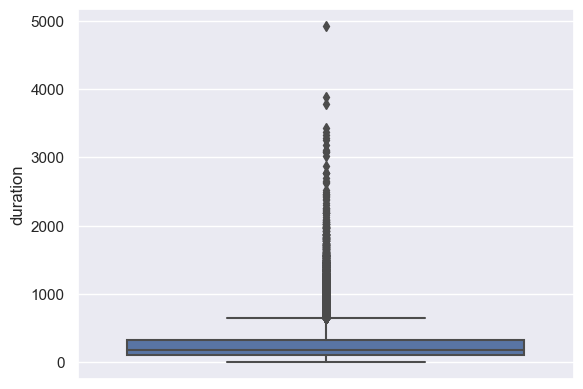

In [69]:
sns.boxplot(y='duration', data=df)

<Axes: xlabel='count', ylabel='previous'>

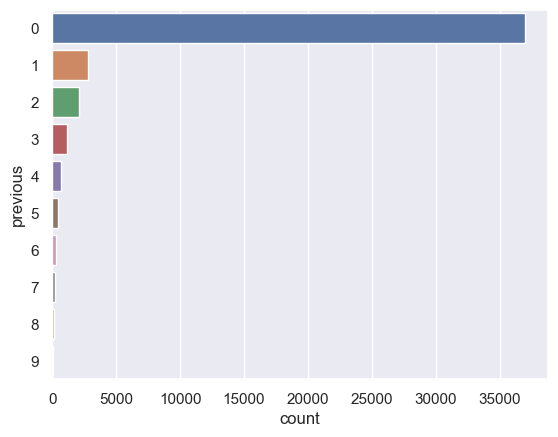

In [70]:

sns.countplot(y='previous',order=pd.value_counts(df['previous']).iloc[:10].index, data=df)

The plot of count of previous column shows that most of the customers did not have any contact at all before the campaign.
So a bold step towards solving the companies problems should include evaluation of contact of customers before campaigns.


<Axes: ylabel='pdays'>

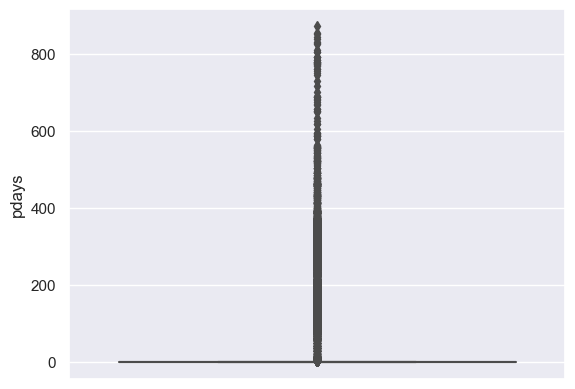

<Axes: ylabel='campaign'>

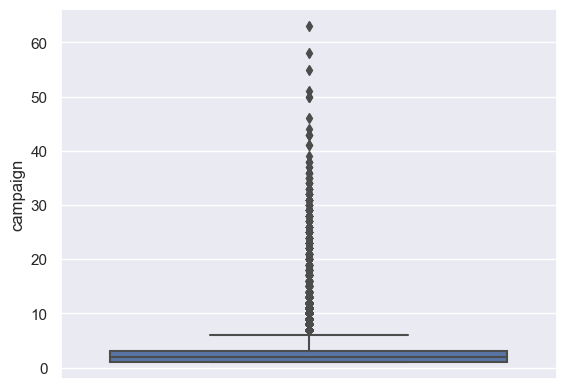

In [73]:
sns.boxplot(y='campaign', data=df)

Bivariate Analysis

In [81]:
#Categorizing the age column
def age_cat(i):
    if i <= 33:
        return 'Young'
    elif i <= 49:
        return 'Advanced adult'
    elif i <= 65:
        return 'Middle aged'
    elif i <= 81:
        return 'Senior citizen'
    else:
        return 'Elder'
# Apply Function to the data
df['age_category'] = df['age'].apply(age_cat)
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_category
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Middle aged
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Advanced adult
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Young


<Axes: xlabel='month', ylabel='pdays'>

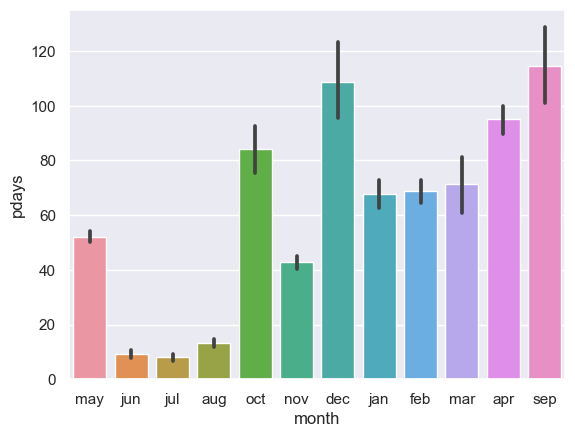

In [74]:
sns.barplot(x='month',y='pdays',data=df)

Jun, Jul and Aug had the shortest pdays followed by Nov, Jan, Feb and March

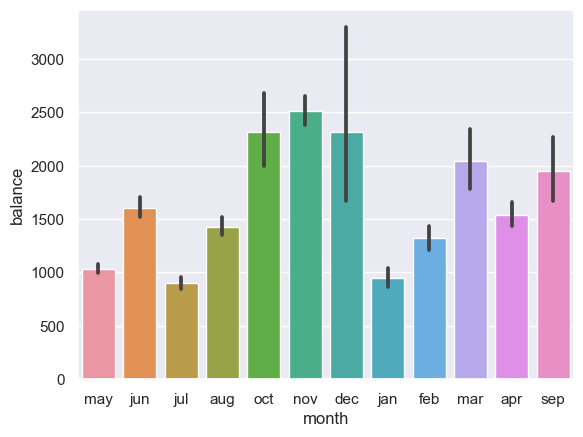

In [75]:
sns.barplot(x='month',y='balance',data=df)
sns.set_palette("husl",3)

Customers had the highest balance in Nov, Dec, Oct respectively. This implies that campaigns conducted around this period promises to be more succesful.

<Axes: xlabel='marital', ylabel='balance'>

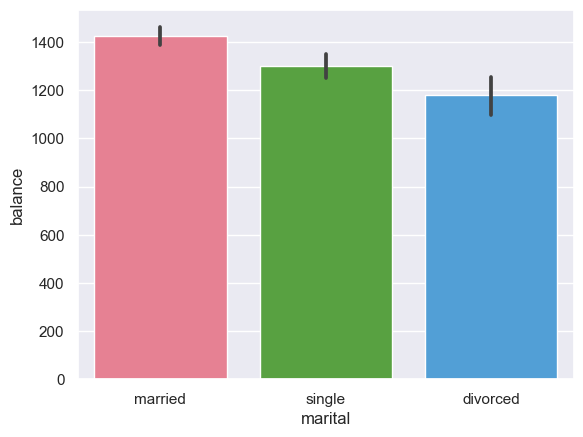

In [76]:
sns.barplot(x='marital',y='balance',data=df)

The married had more balance than every other marital category

<Axes: xlabel='contact', ylabel='campaign'>

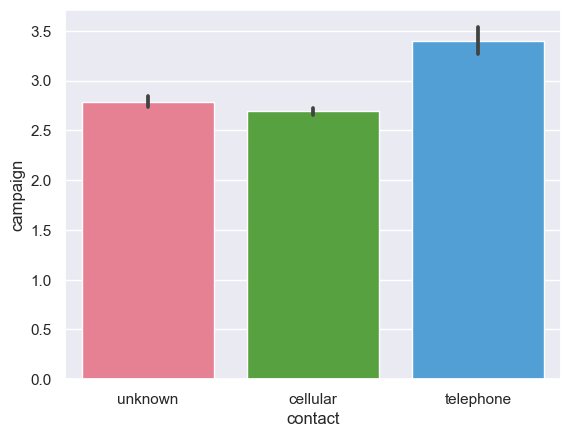

In [77]:
sns.barplot(x='contact',y='campaign',data=df)

<Axes: xlabel='contact', ylabel='campaign'>

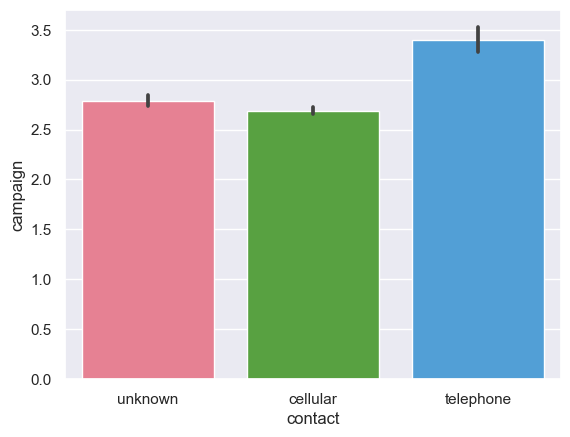

In [78]:
sns.barplot(x='contact',y='campaign',data=df)

<Axes: xlabel='contact', ylabel='balance'>

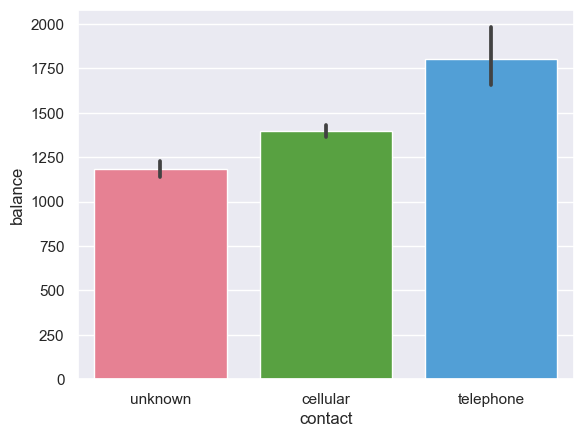

In [79]:
sns.barplot(y='balance', x='contact',data=df)

Multi Variate Analysis

<Axes: xlabel='age_category', ylabel='campaign'>

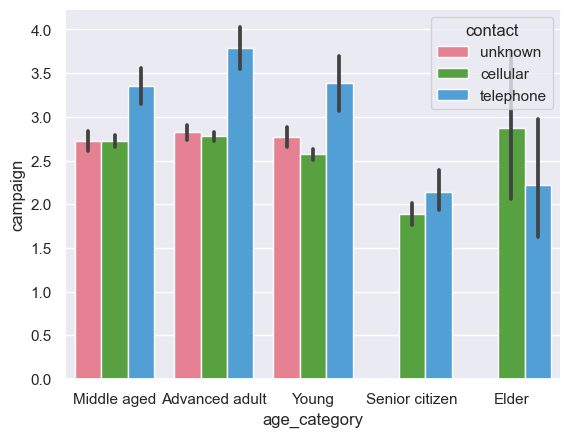

In [83]:
sns.barplot(y='campaign', x='age_category',hue='contact',data=df)

The age category of Senior citizens and Elders seems to require less number of campaigns though a lot still need to be understood.

<Axes: xlabel='age_category', ylabel='balance'>

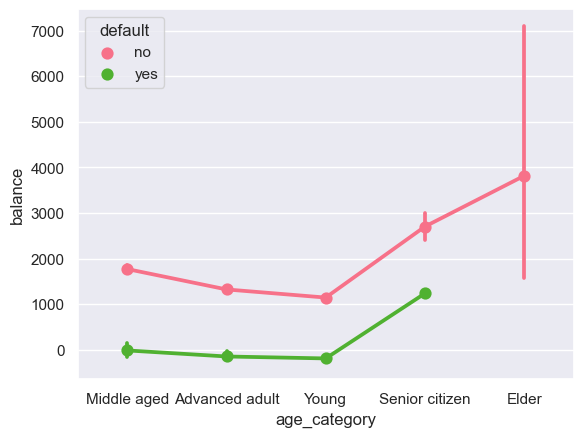

In [84]:
sns.pointplot(y='balance', x='age_category',hue='default',data=df)

The Elders continue to look as the most promising age category, they have higher balance and at the same time have no case of default too

<Axes: xlabel='age_category', ylabel='balance'>

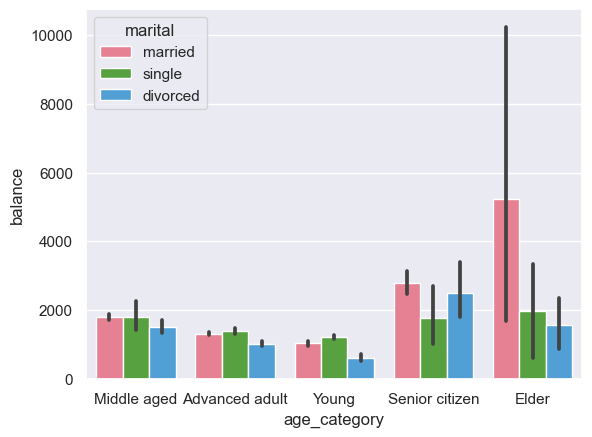

In [85]:
sns.barplot(y='balance', x='age_category',hue='marital',data=df)

The married among Elder age category have significantly higher balance which makes them the most suited for term deposit

<Axes: xlabel='age_category', ylabel='balance'>

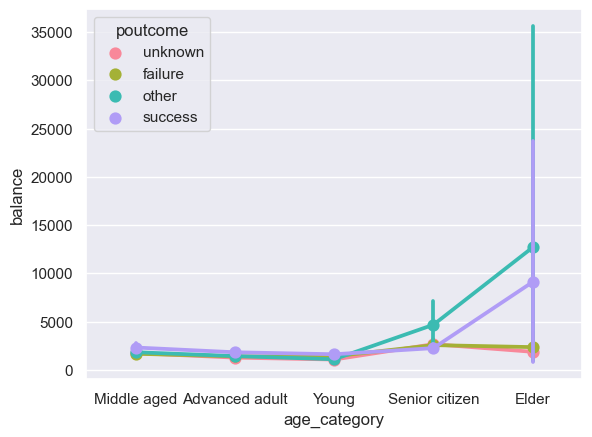

In [86]:
sns.pointplot(y='balance', x='age_category',hue='poutcome',data=df)

The Elderly continued to standout even in terms of successes of the campaign but every other category except for Senior citizens have higher success than failure or unknown.

<Axes: xlabel='month', ylabel='balance'>

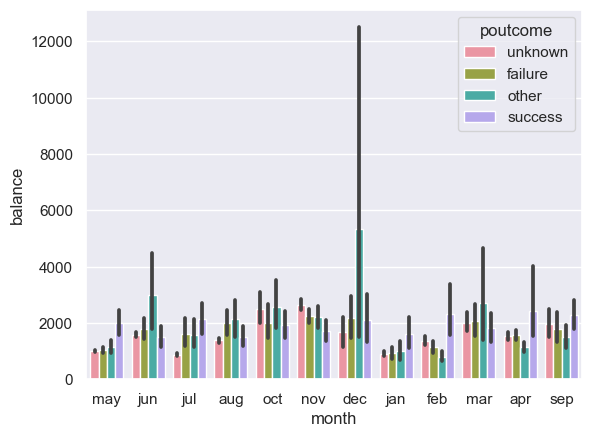

In [87]:
sns.barplot(x='month', y='balance',hue='poutcome',data=df)

Campaigns seems favourable when conducted in may, jul,jan, feb, apr and sep because the outcome will most likely lead to success.

In [89]:
df.drop('age_category', axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Usupervised Machine Learning (UML)

In [3]:
# importing the libraries
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score, homogeneity_score

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [5]:
# Label encoding
for c in df.columns[1:]:
    if (df[c].dtype=='object'):
        df[c]=encoder.fit_transform (df[c])
    else:
        df[c]=df[c]

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [7]:

WCSS=[]
for i in range (1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)
    

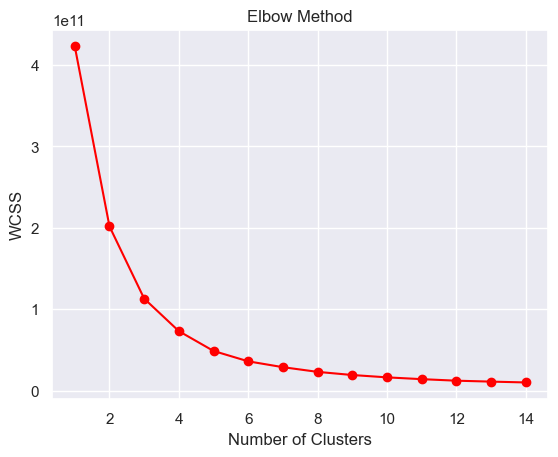

In [8]:
# Deciding number of clusters by Elbow method
plt.plot(range(1,15),WCSS,color='red',marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)
kmeans.fit(df)
df['Clusters']=kmeans.labels_

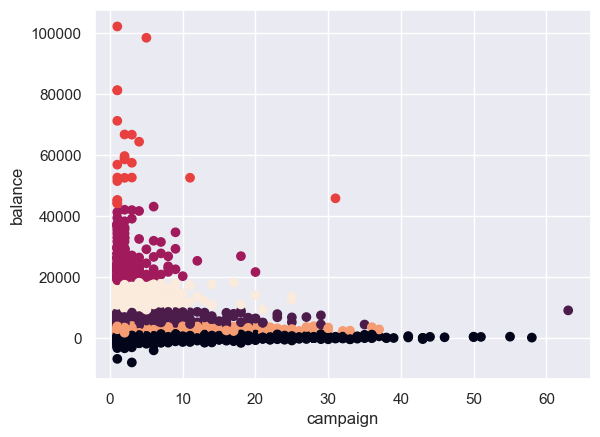

In [10]:
# plot of the clusters
plt.scatter(df['campaign'],df['balance'],c=df['Clusters'],label='centroids')
plt.xlabel('campaign')
plt.ylabel('balance')
plt.show()

In the segmentation of customers according to their balance and campaign, there are customer group 1, who have the highest balance and very low campaign requirement, Group2 has moderate balance between the range of 20000 to 40000 and requiring low campaign, group 3 has moderate balance and low campaign, group 4,5 & 6 has similar campaign requirements but their balance keep reducing as the campaign increases.

In [11]:
# Evaluation metrics
from sklearn.metrics import silhouette_score
silhouette_score(df,kmeans.labels_)

0.6327814149130004

In [13]:
# droping the age_category column
X = df.drop('deposit', axis=1)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Clusters
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,4
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,4
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,0
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,4
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [14]:
y=df['deposit']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: deposit, Length: 45211, dtype: int32

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(31647, 17)
(13564, 17)
(31647,)
(13564,)


In [16]:
from sklearn.preprocessing import RobustScaler

X_train[list(X_train.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_train[list(X_train.select_dtypes(exclude=['object']).columns)])
X_test[list(X_test.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_test[list(X_test.select_dtypes(exclude=['object']).columns)])


# scaler = RobustScaler()
 #X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [17]:
display(X_train.head())
display(X_test.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Clusters
24951,1.266667,0.000000,0.0,-1.0,0.0,0.418502,-1.0,0.0,1.0,0.153846,0.6,0.120930,-0.5,0.0,0.0,0.0,0.0
22129,1.066667,-0.500000,0.0,2.0,0.0,-0.187225,-1.0,0.0,0.0,0.384615,-1.0,-0.051163,0.0,0.0,0.0,0.0,0.0
986,0.733333,-0.666667,0.0,0.0,0.0,-0.214391,0.0,0.0,1.0,-0.692308,0.4,0.172093,0.0,0.0,0.0,0.0,0.0
14999,0.266667,0.000000,0.0,-1.0,0.0,1.049192,0.0,0.0,0.0,0.076923,-0.2,-0.539535,2.0,0.0,0.0,0.0,4.0
4027,0.933333,0.833333,-1.0,1.0,0.0,0.143906,0.0,0.0,1.0,0.000000,0.4,1.548837,2.0,0.0,0.0,0.0,0.0


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Clusters
14001,-0.1250,0.000000,0.0,1.0,0.0,0.718236,0.0,0.0,0.0,-0.461538,-0.2,-0.421296,6.5,0.0,0.0,0.0,4.0
32046,-0.1875,0.500000,1.0,0.0,0.0,-0.519432,0.0,0.0,0.0,-0.153846,-1.2,4.125000,-0.5,0.0,0.0,0.0,0.0
13318,0.5000,-0.500000,0.0,-1.0,0.0,-0.633782,-1.0,1.0,0.5,-0.615385,-0.2,0.282407,1.5,0.0,0.0,0.0,0.0
42991,1.1250,-0.166667,0.0,-1.0,0.0,0.044096,0.0,1.0,0.0,-0.384615,-0.6,-0.356481,2.5,189.0,2.0,-3.0,0.0
14237,-0.3750,-0.500000,0.0,0.0,1.0,-0.633782,0.0,1.0,0.0,-0.153846,-0.2,0.694444,0.0,0.0,0.0,0.0,0.0


In [18]:
print(X_train.shape)
print(X_test.shape)

(31647, 17)
(13564, 17)


In [19]:
from sklearn.model_selection import  cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import tree

Classifier: Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11969
           1       0.46      0.48      0.47      1595

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.88      0.87      0.87     13564



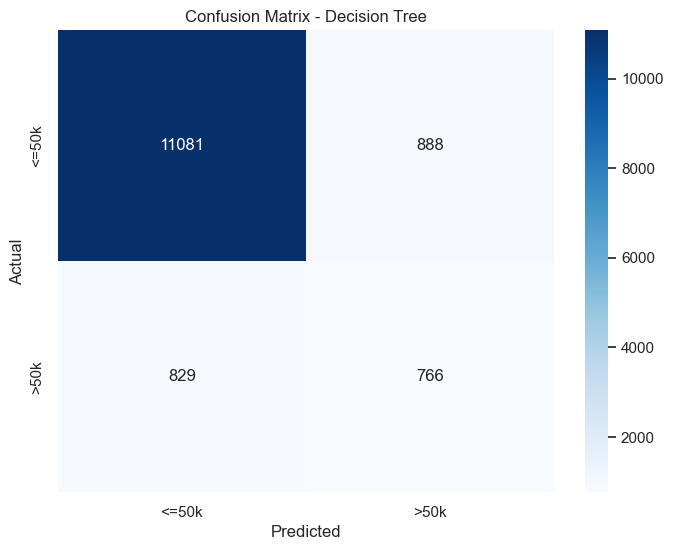





Classifier: K-Nearest Neighbors

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11969
           1       0.55      0.32      0.40      1595

    accuracy                           0.89     13564
   macro avg       0.73      0.64      0.67     13564
weighted avg       0.87      0.89      0.88     13564



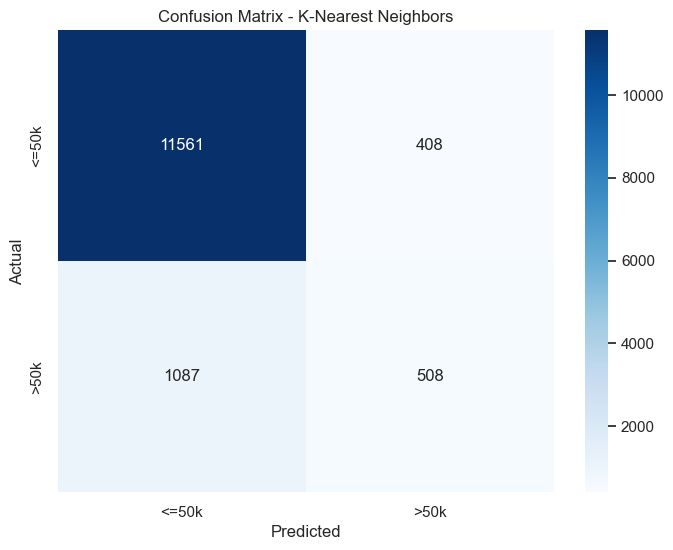





Classifier: Support Vector Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.00      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



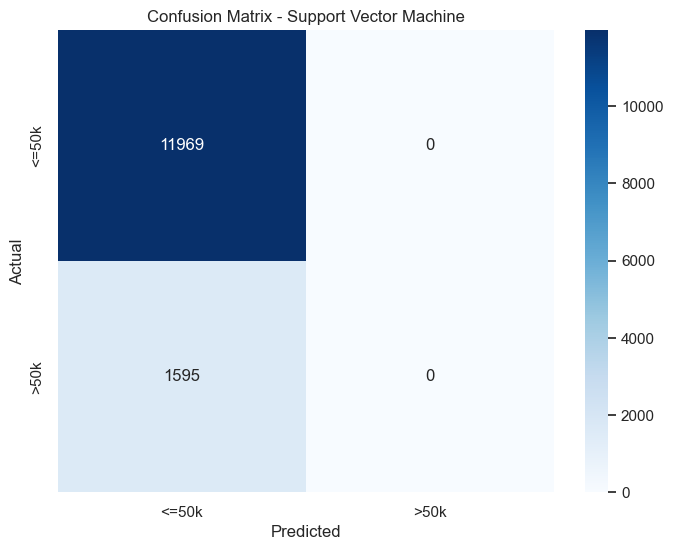





Classifier: Logistic Regression

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.57      0.22      0.31      1595

    accuracy                           0.89     13564
   macro avg       0.74      0.60      0.63     13564
weighted avg       0.86      0.89      0.87     13564



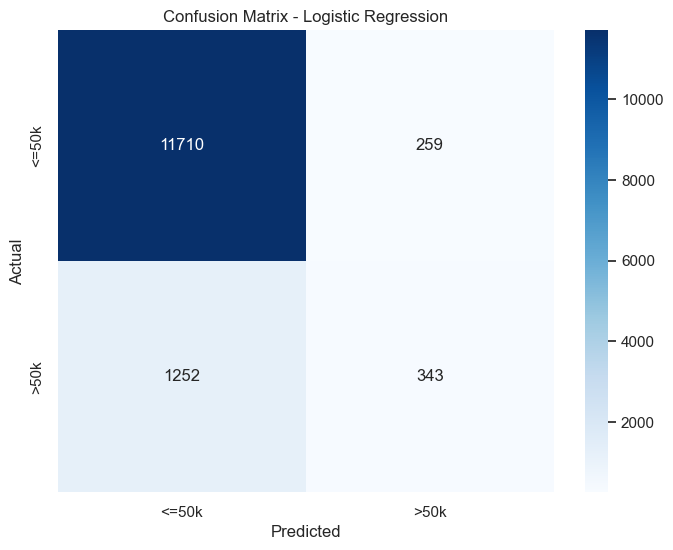





Classifier: Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.63      0.41      0.49      1595

    accuracy                           0.90     13564
   macro avg       0.77      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564



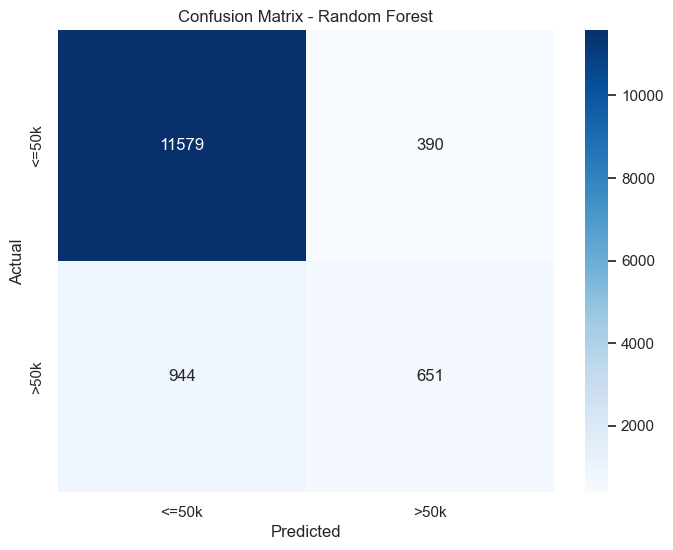





Classifier: Naive Bayes

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     11969
           1       0.36      0.47      0.41      1595

    accuracy                           0.84     13564
   macro avg       0.64      0.68      0.66     13564
weighted avg       0.86      0.84      0.85     13564



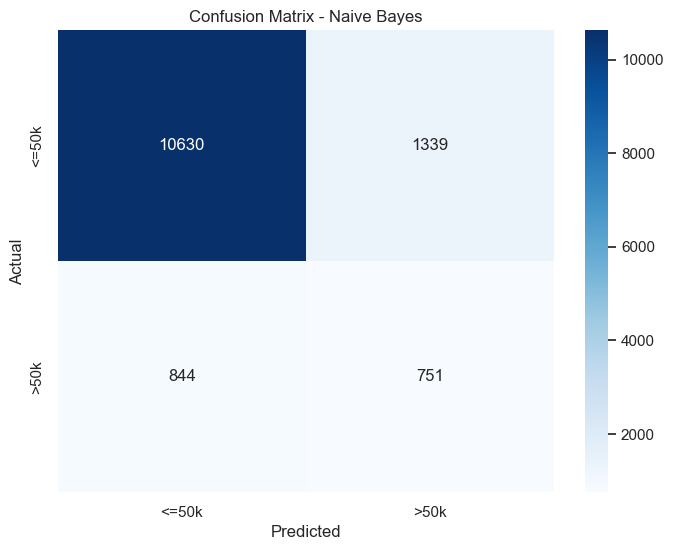





Classifier: Gradient Boosting Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.63      0.38      0.48      1595

    accuracy                           0.90     13564
   macro avg       0.78      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



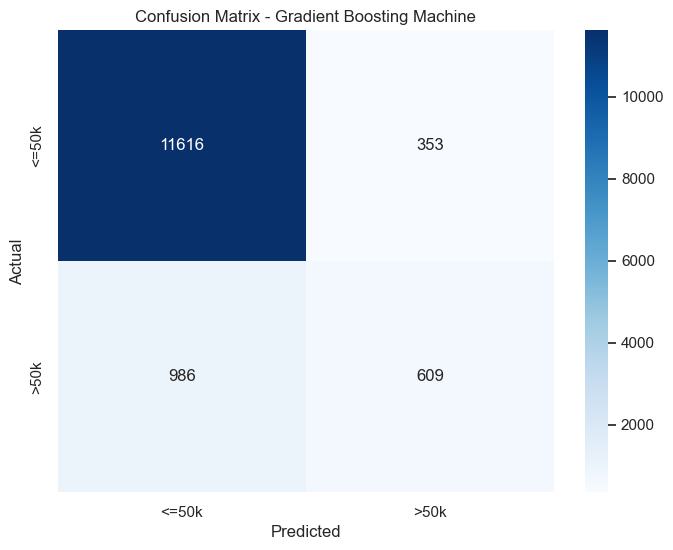





Classifier: XGBoost

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11969
           1       0.61      0.46      0.53      1595

    accuracy                           0.90     13564
   macro avg       0.77      0.71      0.74     13564
weighted avg       0.89      0.90      0.90     13564



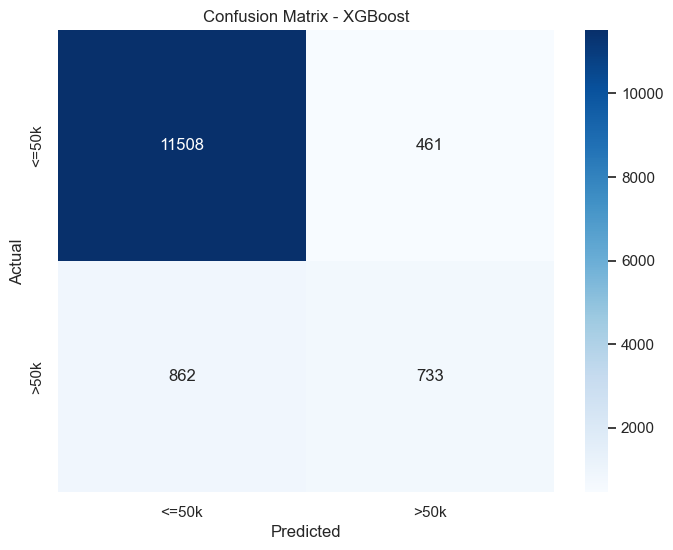

In [20]:
classifiers = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (SVC(), "Support Vector Machine"),
    (LogisticRegression(), "Logistic Regression"),
    (RandomForestClassifier(), "Random Forest"),
    (GaussianNB(), "Naive Bayes"),
    (GradientBoostingClassifier(), "Gradient Boosting Machine"),
    (xgb.XGBClassifier(), "XGBoost")
]

# Iterate through the list of classifiers
for classifier, name in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # Print the classifier's name
    print("Classifier:", name)
    
    # Print the classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    
  
    
    # Create Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plotting the confusion matrix with colors
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['<=50k','>50k'], yticklabels=['<=50k','>50k'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Add a separator for clarity
    
    print("="*100)
    print('\n\n\n')

In [21]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


for classifier, name in classifiers:
    y_pred = classifier.predict(X_test)  # Replace X_test with your test data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_df = metrics_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision,
                                    'Recall': recall, 'F1-Score': f1}, ignore_index=True)
    metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

display(metrics_df)

,Model,Accuracy,Precision,Recall,F1-Score
7,XGBoost,0.902462,0.893108,0.902462,0.896254
0,Random Forest,0.901651,0.889429,0.901651,0.892429
1,Gradient Boosting Machine,0.901283,0.887810,0.901283,0.890335
2,K-Nearest Neighbors,0.889782,0.871787,0.889782,0.876400
3,Decision Tree,0.873415,0.875447,0.873415,0.874408
4,Logistic Regression,0.888602,0.864177,0.888602,0.865646
5,Naive Bayes,0.839059,0.859755,0.839059,0.848170
6,Support Vector Machine,0.882409,0.778646,0.882409,0.827287


In [22]:
importances = classifier.feature_importances_

feature_names = X_train.columns  # Replace with the actual feature names or column labels
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


      Feature  Importance
15   poutcome    0.203168
8     contact    0.138505
6     housing    0.128808
11   duration    0.107936
10      month    0.068913
7        loan    0.061357
13      pdays    0.058727
9         day    0.031808
0         age    0.029837
14   previous    0.028118
12   campaign    0.025577
2     marital    0.024799
3   education    0.023760
5     balance    0.022794
1         job    0.018734
16   Clusters    0.015145
4     default    0.012016
